## 1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt

import env

In [4]:
# Load mpg dataset

mpg = data('mpg')
mpg.head() 

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


#### `a. On average, which manufacturer has the best miles per gallon?`

In [7]:
mpg.groupby('manufacturer')['cty', 'hwy'].mean().sort_values(by='hwy')

,cty,hwy
manufacturer,,
land rover,11.500000,16.500000
lincoln,11.333333,17.000000
jeep,13.500000,17.625000
dodge,13.135135,17.945946
mercury,13.250000,18.000000
ford,14.000000,19.360000
chevrolet,15.000000,21.894737
nissan,18.076923,24.615385
toyota,18.529412,24.911765


In [6]:
import warnings
warnings.filterwarnings('ignore')

####  `b.  How many different manufacturers are there?`

In [8]:
mpg.manufacturer.nunique()

15

In [ ]:
mpg.manufacturer.describe()

#### `c. How many different models are there?`

In [9]:

mpg.model.nunique()

38

In [10]:
mpg.model.describe()

count             234
unique             38
top       caravan 2wd
freq               11
Name: model, dtype: object

#### `d.  Do automatic or manual cars have better miles per gallon?`

In [11]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s4)       3
auto(s5)       3
auto(l3)       2
Name: trans, dtype: int64

In [12]:
mpg['trans_category'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_category
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto


In [14]:
mpg.groupby('trans_category')[['cty', 'hwy']].mean()

,cty,hwy
trans_category,,
auto,15.968153,22.292994
manual,18.675325,25.779221


# 2. Joining and Merging
####  `Copy the users and roles dataframes from the examples above.`
####  `What do you think a right join would look like?` `An outer join?`
####  `What happens if you drop the foreign keys from the dataframes and try to merge them?`



In [15]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [16]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [ ]:
a.

In [17]:
right_join = pd.merge(users, roles, left_on='role_id', right_on='id', how='right')
right_join

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [18]:
pd.merge(users, 
         roles, 
         left_on='role_id', 
         right_on='id', 
         how='outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


# 3. Getting data from SQL databases

####  `a.  Create a function named get_db_url.  `

In [3]:
from env import host, password, user

In [4]:

def get_db_url(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

#### `b. Use your function to obtain a connection to the employees database.`

In [29]:
employees = pd.read_sql(sql_query, get_db_url('employees'))
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


#### `c.Intentionally make an error in your SQL query.`

In [10]:
sql_query = 'SELECT # From salaries'
slq_query


NameError: name 'slq_query' is not defined

####   `d. Read the employees and titles tables into two separate dataframes`

In [32]:
sql_query = 'SELECT * FROM titles'

titles = pd.read_sql(sql_query, get_db_url('employees'))
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [33]:
titles.to_csv('titles.csv')

In [35]:
titles = pd.read_csv('titles.csv', index_col=0)
titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     443308 non-null  int64 
 1   title      443308 non-null  object
 2   from_date  443308 non-null  object
 3   to_date    443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 16.9+ MB


In [37]:
employees.info

<bound method DataFrame.info of         emp_no  birth_date first_name last_name gender   hire_date
0        10001  1953-09-02     Georgi   Facello      M  1986-06-26
1        10002  1964-06-02    Bezalel    Simmel      F  1985-11-21
2        10003  1959-12-03      Parto   Bamford      M  1986-08-28
3        10004  1954-05-01  Chirstian   Koblick      M  1986-12-01
4        10005  1955-01-21    Kyoichi  Maliniak      M  1989-09-12
...        ...         ...        ...       ...    ...         ...
300019  499995  1958-09-24     Dekang  Lichtner      F  1993-01-12
300020  499996  1953-03-07       Zito      Baaz      M  1990-09-27
300021  499997  1961-08-03    Berhard    Lenart      M  1986-04-21
300022  499998  1956-09-05   Patricia   Breugel      M  1993-10-13
300023  499999  1958-05-01     Sachin   Tsukuda      M  1997-11-30

[300024 rows x 6 columns]>

#### `e. Visualize the number of employees with each title.`

In [38]:
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [39]:
titles.shape

(443308, 4)

In [40]:
boolean_series = titles.to_date == titles.to_date.max()
boolean_series.head()

0     True
1     True
2     True
3    False
4     True
Name: to_date, dtype: bool

In [42]:
employee_titles = titles[boolean_series]
employee_titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
5,10005,Senior Staff,1996-09-12,9999-01-01


In [44]:
employee_titles.shape

(240124, 4)

In [45]:
titles_held = employee_titles.title.value_counts()
titles_held.head()

Senior Engineer     85939
Senior Staff        82024
Engineer            30983
Staff               25526
Technique Leader    12055
Name: title, dtype: int64

<AxesSubplot:>

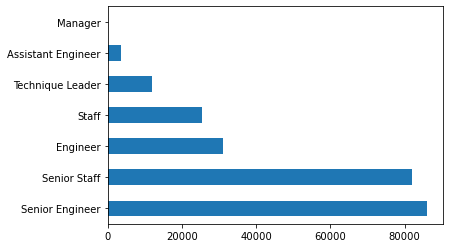

In [46]:
#Visualization
titles\
    [titles.to_date == titles.to_date.max()]\
    .title\
    .value_counts()\
    .plot.barh()

#### `f.  Join the employees and titles dataframes together.`

In [48]:
joined_employees_titles = employees.merge(titles, on='emp_no')
joined_employees_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


#### ` g. Visualize how frequently employees change titles.`

In [49]:
# number of titles for each employee
joined_employees_titles.emp_no.value_counts().sample(5)


489858    2
14131     1
291515    1
109915    1
208132    1
Name: emp_no, dtype: int64

In [50]:
#title frequency 
title_frequency = joined_employees_titles.emp_no.value_counts()
title_frequency.value_counts()

1    159754
2    137256
3      3014
Name: emp_no, dtype: int64

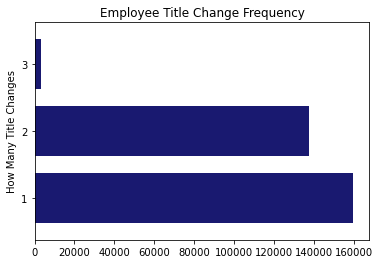

In [58]:
#visualization 
title_frequency.value_counts().plot(kind='barh', 
                            color='midnightblue', 
                                    width=.75)

plt.title('Employee Title Change Frequency')
plt.ylabel('How Many Title Changes')



plt.show()

#### ` h.  For each title, find the hire date of the employee that was hired most recently with that title.`

In [63]:
joined_employees_titles.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [68]:
dept_title_query = '''
SELECT *
FROM titles t
JOIN dept_emp de USING(emp_no)
JOIN departments d USING(dept_no)
'''



In [71]:
dept_titles = pd.read_sql(dept_title_query, get_db_url('employees'))

In [72]:
dept_titles.to_csv('dept_titles.csv')

In [73]:
dept_titles = pd.read_csv('dept_titles.csv', index_col=0)
dept_titles.head()

,dept_no,emp_no,title,from_date,to_date,from_date.1,to_date.1,dept_name
0,d009,10011,Staff,1990-01-22,1996-11-09,1990-01-22,1996-11-09,Customer Service
1,d009,10038,Senior Staff,1996-09-20,9999-01-01,1989-09-20,9999-01-01,Customer Service
2,d009,10038,Staff,1989-09-20,1996-09-20,1989-09-20,9999-01-01,Customer Service
3,d009,10049,Senior Staff,2000-05-04,9999-01-01,1992-05-04,9999-01-01,Customer Service
4,d009,10049,Staff,1992-05-04,2000-05-04,1992-05-04,9999-01-01,Customer Service


In [75]:
dept_titles.shape

(489903, 8)

#### ` i. Write the code necessary to create a cross tabulation of the number of titles by department`

In [76]:
title_crosstab = pd.crosstab(dept_titles.dept_name, dept_titles.title)
title_crosstab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


# 4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

#### `a. What is the total price for each order?`

In [80]:
chipotle_sql_query = '''
                     SELECT *
                     FROM orders;
                     '''

In [82]:
chipotle_orders = pd.read_sql(chipotle_sql_query, get_db_url('chipotle'))
chipotle_orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [84]:
chipotle_orders.shape

(4622, 6)

In [85]:
chipotle_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


In [87]:
chipotle_orders['item_price'] = chipotle_orders.item_price.str.replace('$', '').astype(float)
chipotle_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4622 non-null   int64  
 1   order_id            4622 non-null   int64  
 2   quantity            4622 non-null   int64  
 3   item_name           4622 non-null   object 
 4   choice_description  4622 non-null   object 
 5   item_price          4622 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 216.8+ KB


In [93]:
total_chipotle_orders = chipotle_orders.groupby('order_id').item_price.sum()
total_chipotle_orders

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

#### `b. What are the most popular 3 items? `

In [102]:
top_three_items = chipotle_orders.groupby('item_name').quantity.sum().sort_values(ascending = False).head(3)
top_three_items

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

#### `c. Which item has produced the most revenue?`

In [103]:
chipotle_orders.groupby('item_name').item_price.sum().nlargest(10)

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Steak Burrito          3851.43
Steak Bowl             2260.19
Chips and Guacamole    2201.04
Chicken Salad Bowl     1228.75
Chicken Soft Tacos     1108.09
Veggie Burrito          934.77
Barbacoa Burrito        894.75
Veggie Bowl             867.99
Name: item_price, dtype: float64

In [104]:
chipotle_orders.groupby('order_id').item_price.sum().median()

16.2